# <font color=blueviolet>Multiclass Classification of wine quality </font>

<font color=black>The quality of the wine is an indicator of the true taste of the wine, which mainly depends on its chemical composition, but also on its color and aroma.<br>In this analysis, there are two sets of data related to red and white wine samples. The aim is to model wine quality based on personal taste using measured physico-chemical values.</font>

<font color=blue>In this first part of the project, the data will be analyzed within the framework of Exploratory Data Analysis.</font>

## <font color=green>EDA</font>

<font color=black>The required modules for EDA are first imported.</font>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font color=blue>There are two CSV files for red and white wine. These are read and stored as DataFrames and then merged after adding a column to indicate if the wine is white or red.</font>

In [2]:
# reading the two files
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# adding the type of wine
red_wine.insert(0, "type", 1)
white_wine.insert(0, "type", 0)

# concatenating the red and white wine dataframes
wine = red_wine.append(white_wine, ignore_index=True)

<font color=blue>The first step in EDA is to examine the first rows of the Data-frame.</font>

In [3]:
# display the first five rows of the dataframe
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<font color=blue>There are 11 numerical features plus a column for the type of wine and the last column is the classification target.</font> 

In [4]:
# checkig the datatypes
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<font color=blue>The data frame contains 6497 rows and no value is missing.</font>

<font color=black>Next, the statistics of the data frame are calculated and the 7 specific values can be viewed using the describe() method.</font>

In [5]:
# display two digital places 
pd.options.display.float_format = '{:.2f}'.format                   

# display statistics of the data
wine.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,0.25,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,0.43,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,0.00,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,0.00,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,0.00,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,0.00,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,1.00,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


<font color=blue>Research on the Internet shows that these values are realistic.</font>

### <font color=blueviolet>**Duplicates**</font>

<font color=black>Duplicates are kept as multiple wine tasters may have rated the same wine equally. And so duplicates would add more weight to that quality.</font>

## <font color=green>Features distribution</font>

<font color=blue>Now the distribution and correlation of the features will be analyzed.</font>

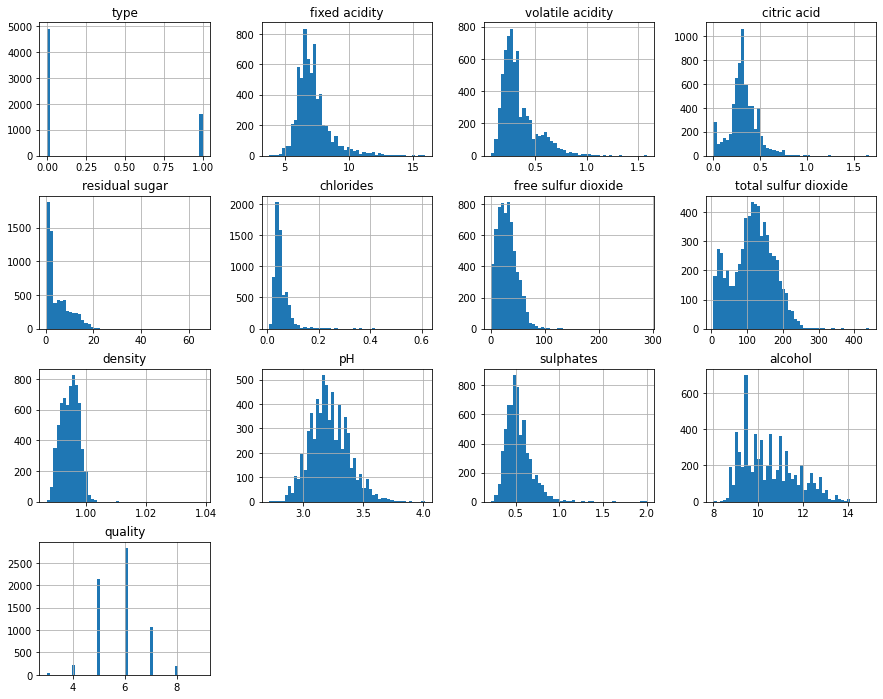

In [6]:
# features distribution
wine.hist(bins=50, figsize=(15,12));

<font color=blue>**pH** is normally distributed. Most other features have a skewed normal distribution, and both "residual sugars" and "chlorides" are heavily skewed. Better distribution is possible by using the log function:</font>

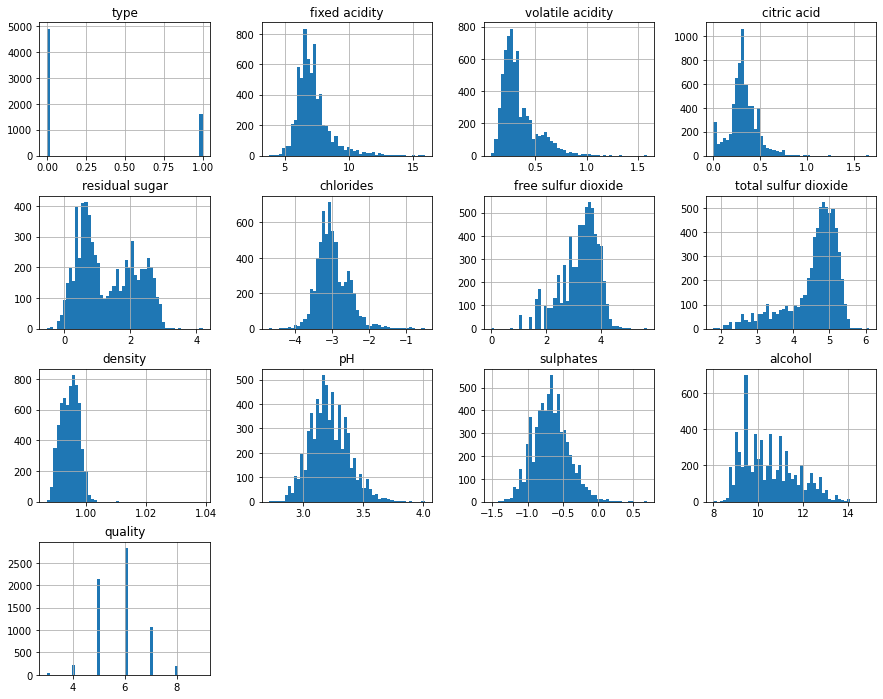

In [7]:
# Applying log function to the heavily skewed features
skewed_features=['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
for feature in skewed_features:
    wine[feature] = np.log(wine[feature])

#redrawing the features distribution
wine.hist(bins=50, figsize=(15,12));

<font color=black>The distribution is now significantly better, especially for "residual sugars" and "chlorides".</font>

### <font color=blueviolet>Distribution of features according to wine type</font>

<font color=blue>The following charts show the distribution of features for each wine variety.</font>

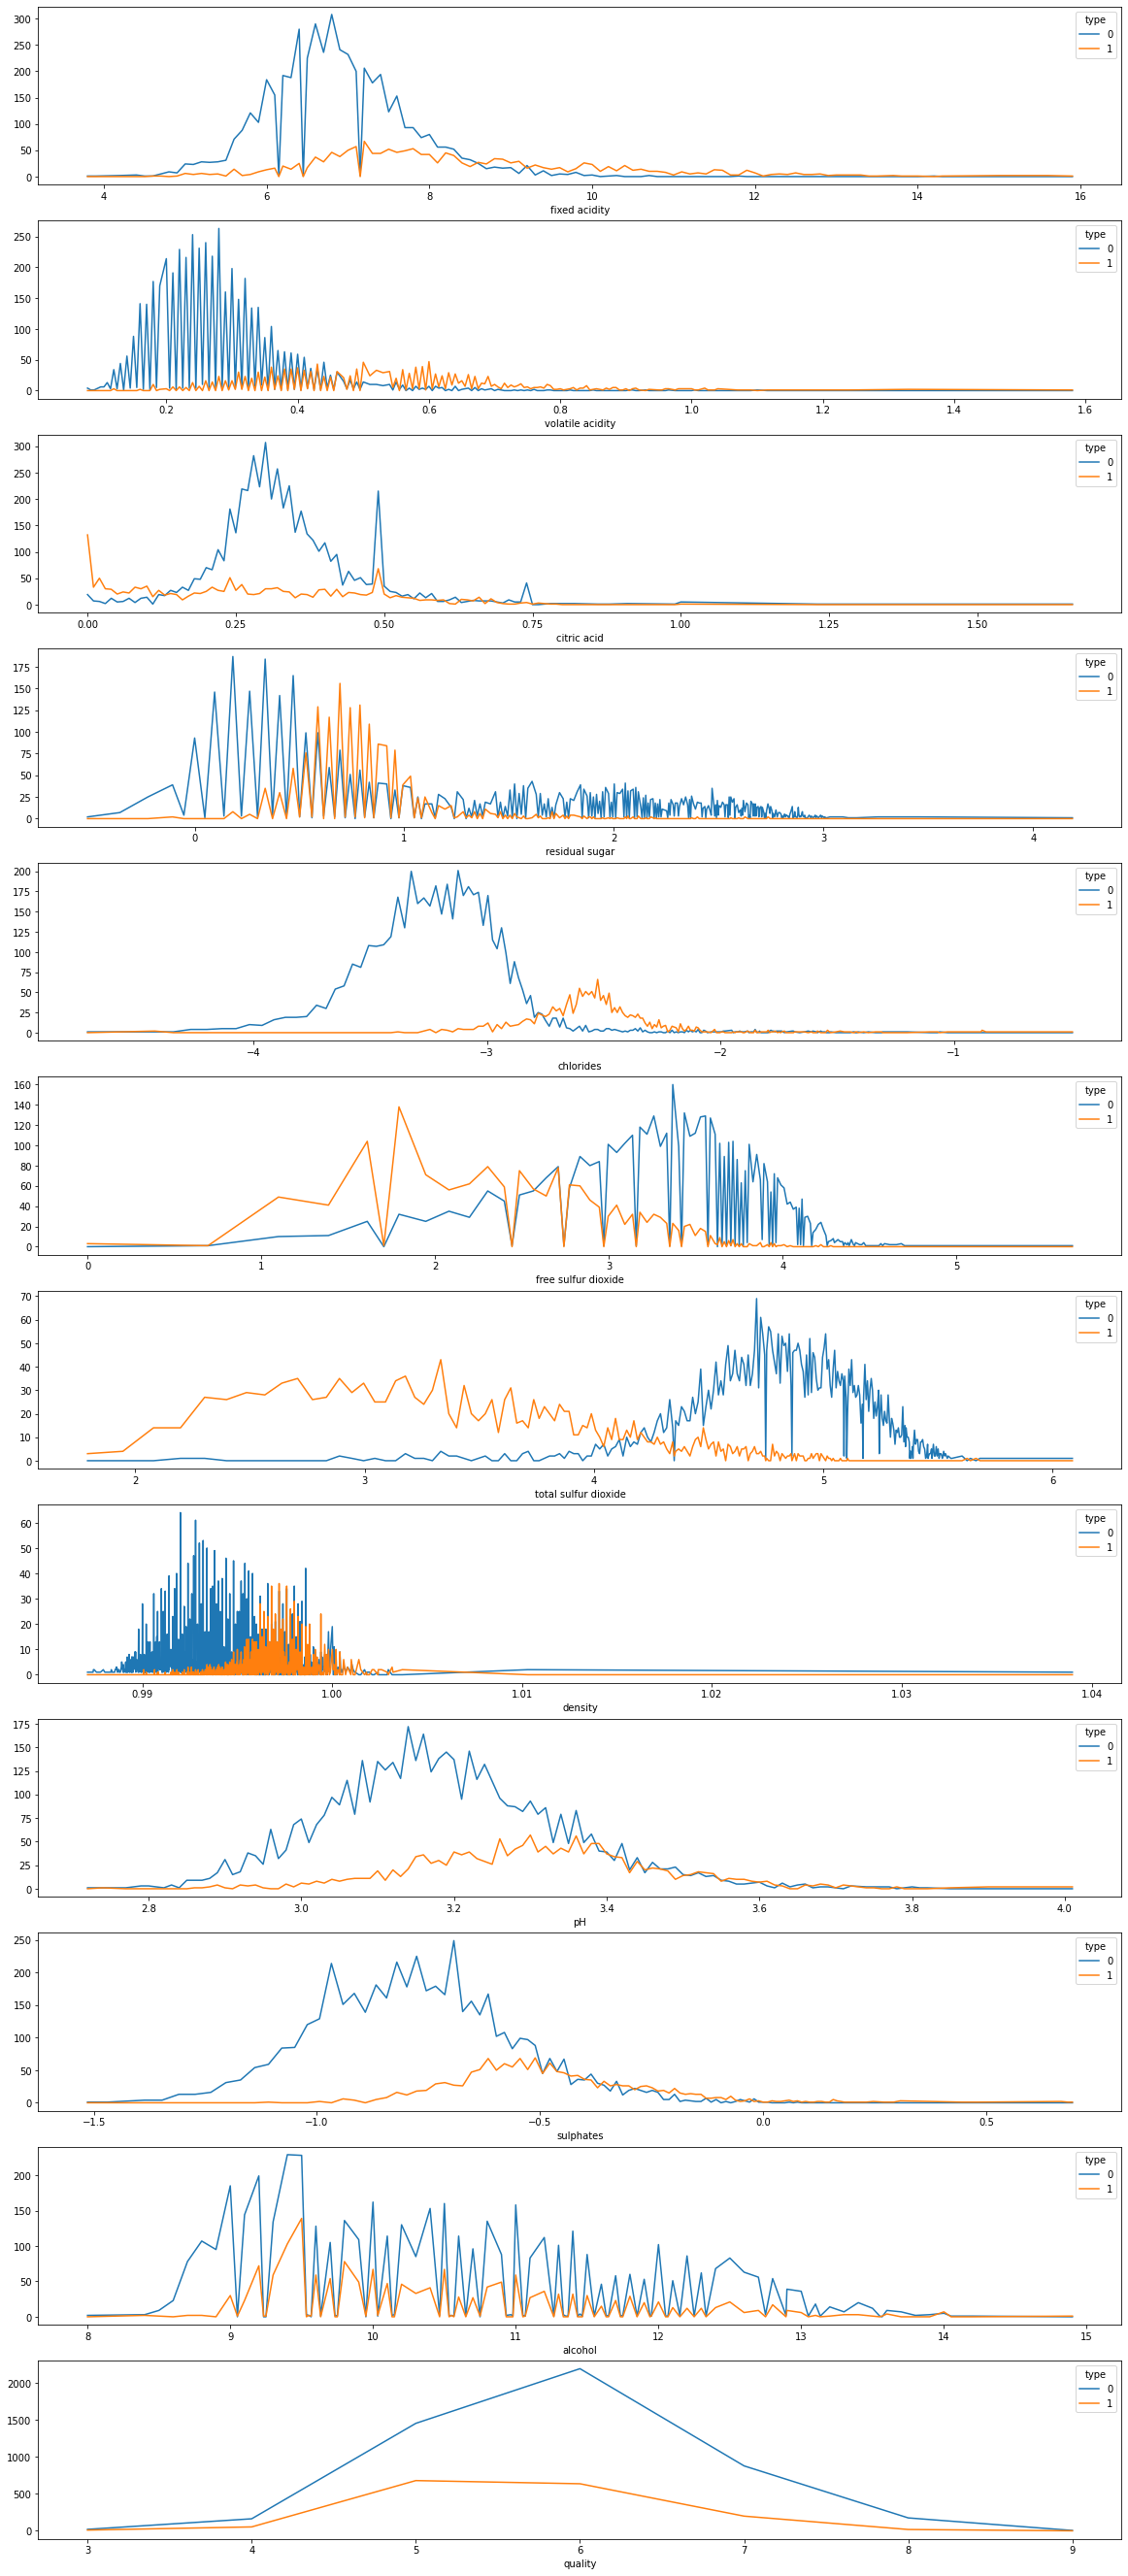

In [8]:
# Feature distribution as function of wine-type
fig, ax = plt.subplots(nrows=12,figsize=[20,48])
wine_features_names=['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                     'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for i in range(1,wine.shape[1]):
    pd.crosstab(index= wine[wine_features_names[i]], columns=wine[wine_features_names[0]]).plot(ax=ax[i-1]);

<font color=black>Some characteristics such as "residual sugar", "chlorides" and "density" behave differently depending on the type of wine. This could lead to the assumption that wine type could play a large role in classifying wine quality.</font>

### <font color=blueviolet>Correlation between features</font>

<font color=black>The "heat map" is used to show the possible correlation between the features.</font>

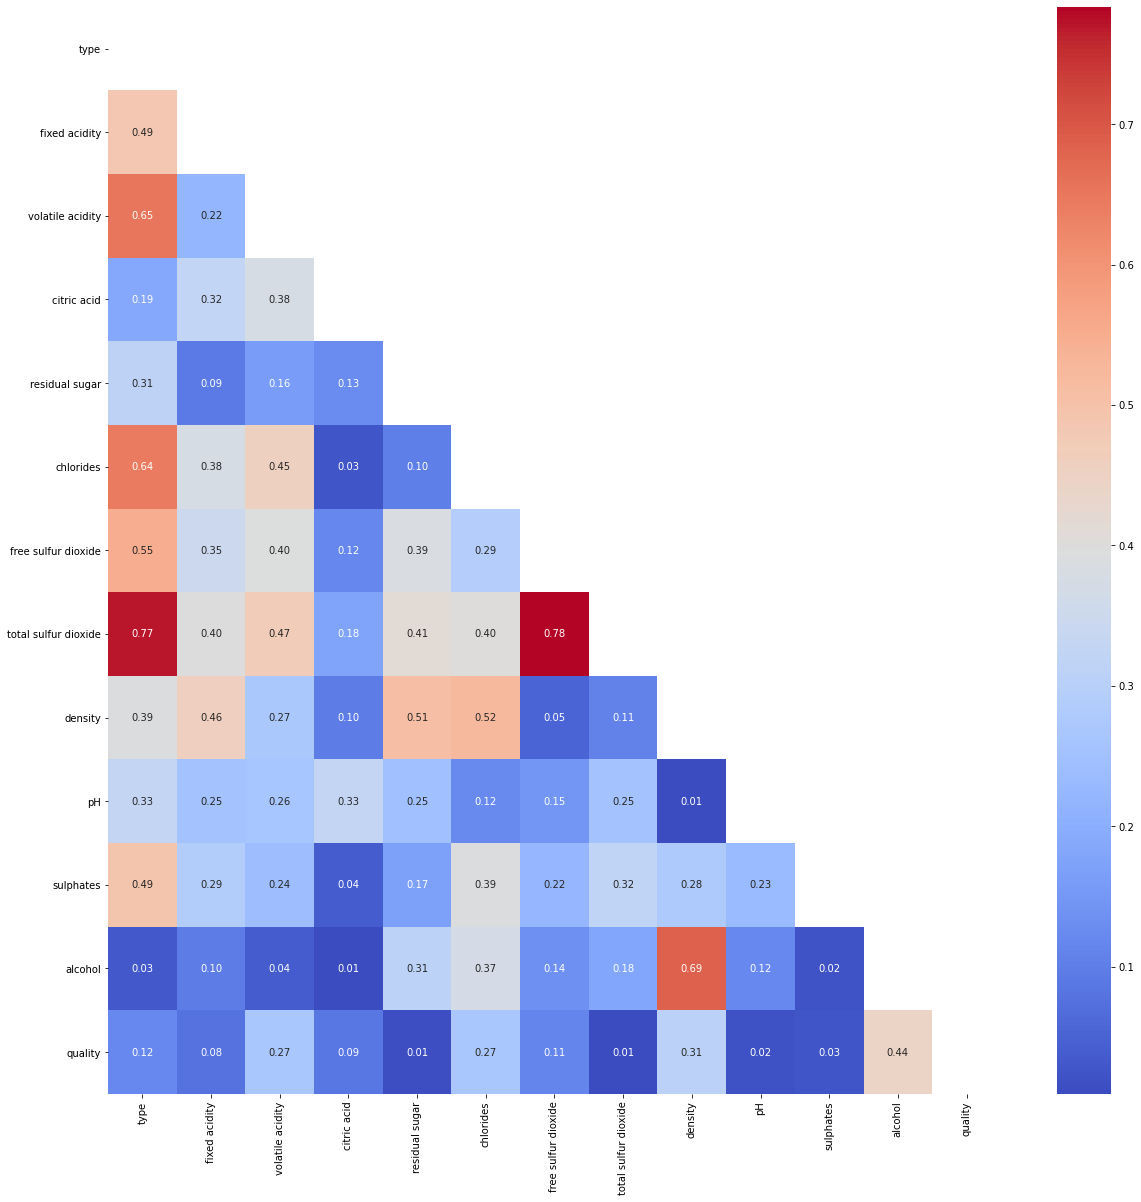

In [9]:
# investigate correlation between features
fig, ax = plt.subplots(figsize=[20,20])
corr= wine.corr()
triangle = np.triu(corr)
sns.heatmap(corr.abs(), annot=True, fmt='.2f', mask=triangle,cmap= 'coolwarm' , ax=ax);

<font color=blue>There are correlations between some features, but they are not very strong.</font>

<font color=black>The correlations between features could also be examined by scatterplots.</font>

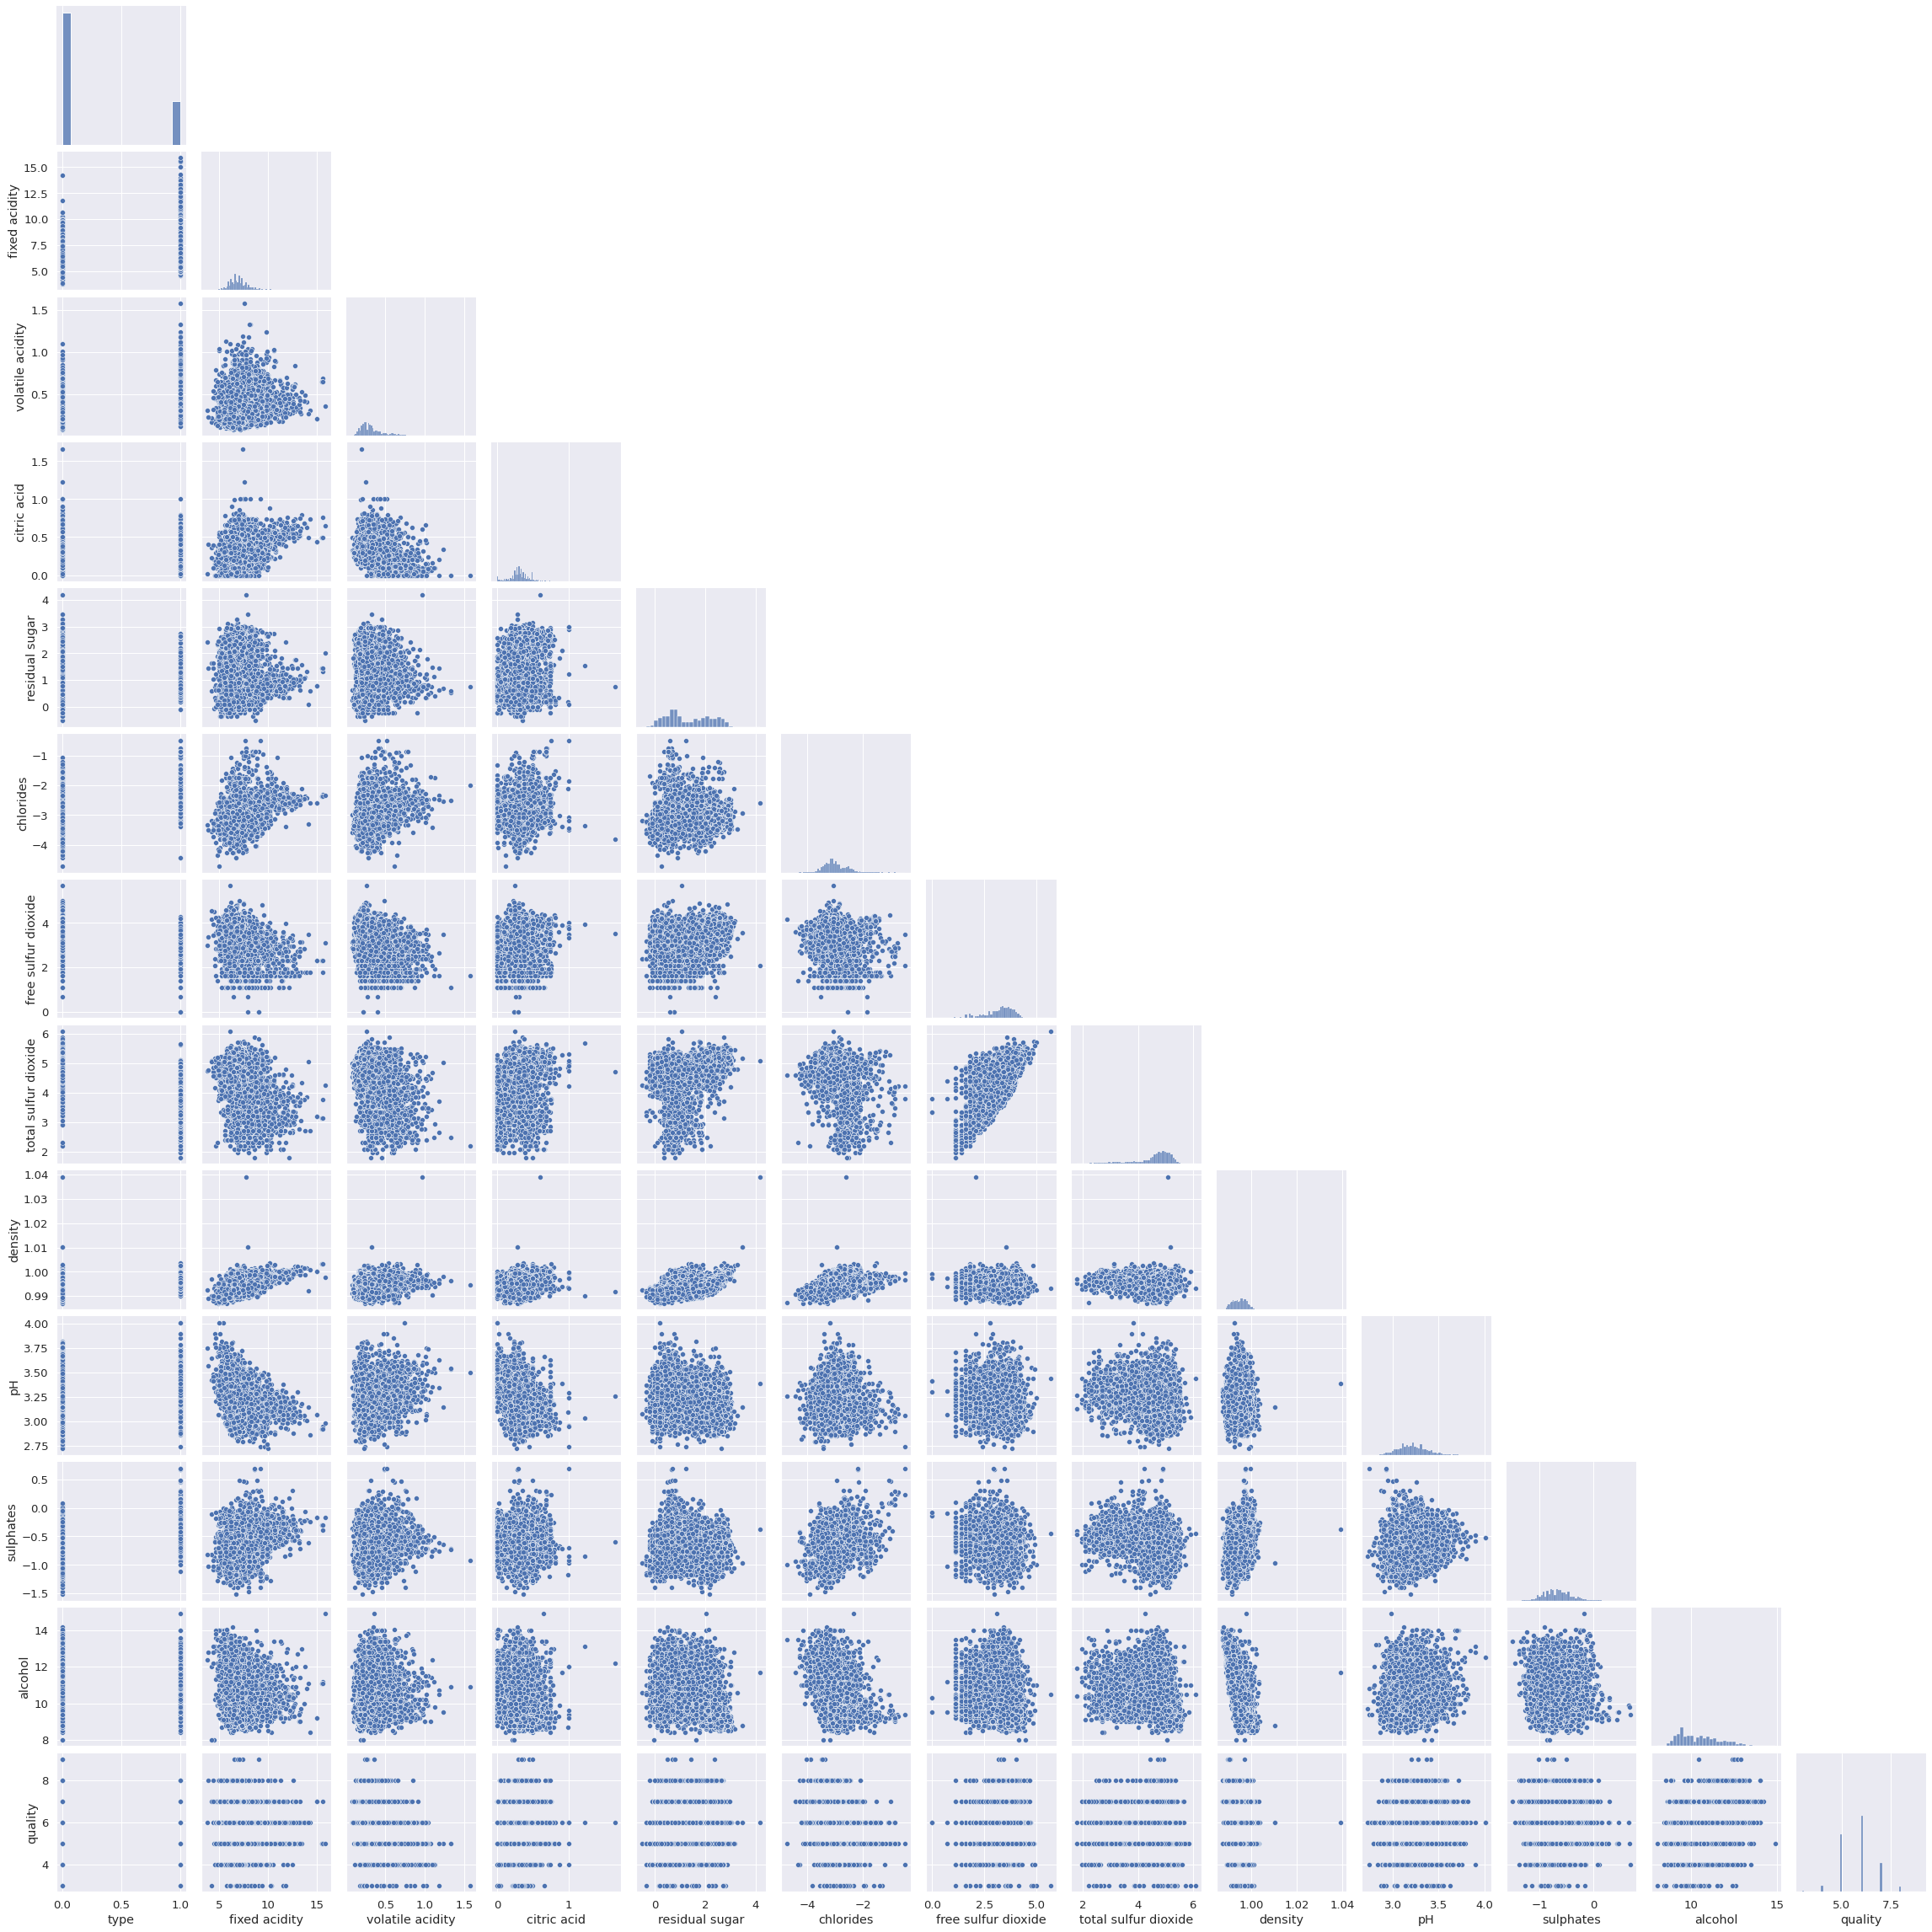

In [10]:
# Scatterplots of each pair of features
sns.set(font_scale=1.2)
sns.pairplot(wine,corner=True);

### <font color=blueviolet>Data distribution per Class</font>

<font color=black>An important step in EDA is to check the possible class imbalance.</font>

In [11]:
# Data distribution per classes
wine["quality"].value_counts(normalize=True) * 100

6   43.65
5   32.91
7   16.61
4    3.32
8    2.97
3    0.46
9    0.08
Name: quality, dtype: float64

<font color=blue>The quality values are limited in the interval [3,9].</font>

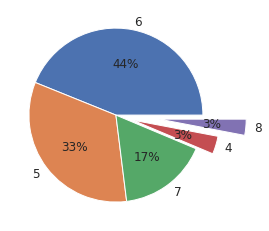

In [12]:
# Using a pie chart to show the data distribution per class
explode = (0, 0, 0, 0.2, 0.5)
plt.pie(wine["quality"].value_counts()[:5],autopct="%1.0f%%",textprops={'fontsize': 12},explode=explode,labels=['6','5','7','4','8']);

<font color=blue>The classes are clearly unbalanced. Most quality values are 6, 5, or 7.</font>

## <font color=green>outliers</font>

<font color=black>The boxplots could be used to examine the presence of outliers in each feature.</font>

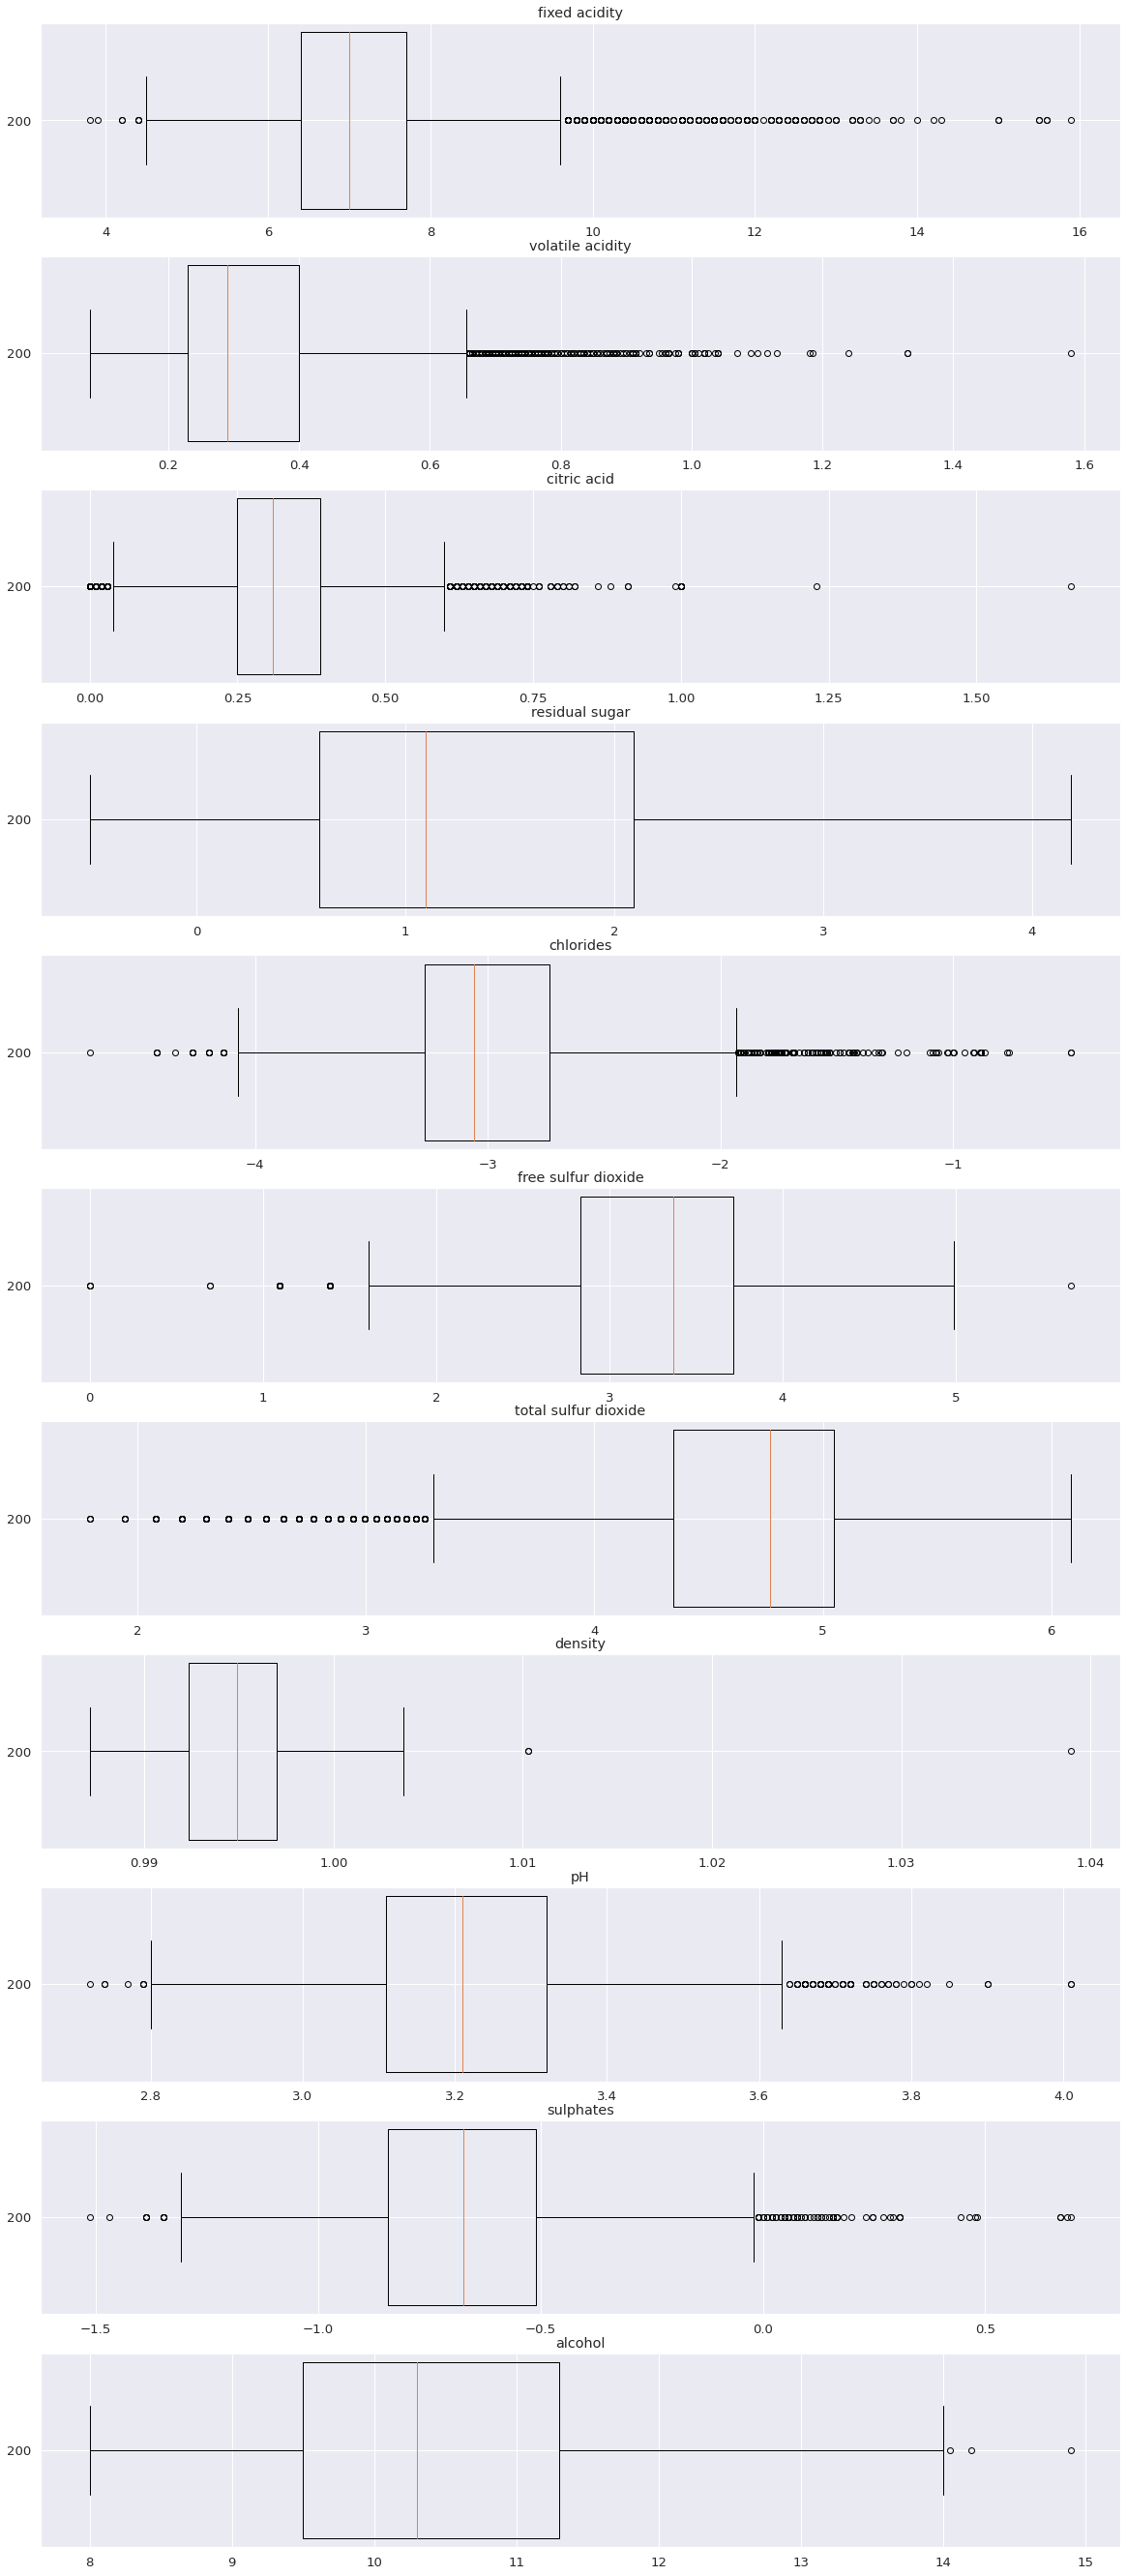

In [13]:
# detecting outlier
fig, ax = plt.subplots(nrows=11,figsize=[20,48])
i=0
for col_name in red_wine.columns[1:-1]:
    ax[i].boxplot(wine[col_name],vert=False, positions=[200],widths=50)
    ax[i].set(title=col_name)
    i+=1

<font color=blue>Some data points could be considered outliers.</font>

### <font color=green></font>